In [1]:
%load_ext autoreload
%autoreload 2

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from wfa.utils.get_new_images import stitch_tiles

In [2]:
cat_pred1 = [[3, 4, 6, 5, 5, 2, 9, 9, 5, 2],
             [5, 4, 6, 4, 2, 5, 9, 1, 1, 0],
             [2, 2, 6, 6, 6, 2, 9, 1, 9, 2],
             [6, 2, 6, 6, 6, 6, 9, 5, 9, 0],
             [4, 0, 0, 6, 6, 6, 9, 8, 5, 0],
             [6, 2, 6, 4, 6, 6, 1, 5, 5, 0],
             [6, 6, 6, 0, 6, 6, 2, 5, 5, 5],
             [6, 6, 6, 6, 2, 6, 6, 2, 8, 9],
             [1, 2, 6, 6, 6, 6, 6, 6, 2, 9],
             [5, 9, 6, 6, 6, 6, 6, 6, 6, 2]]
cat_pred1 = np.array(cat_pred1)

changes = [[0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
           [0, 0, 1, 1, 0, 1, 0, 0, 1, 0],
           [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
           [1, 1, 0, 1, 1, 1, 0, 1, 0, 0],
           [0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
           [0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
           [1, 1, 1, 0, 1, 0, 0, 0, 1, 0],
           [1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
           [0, 0, 0, 1, 0, 0, 0, 0, 0, 1]]
changes = np.array(changes)

cat_pred = []
for i in range(10):
    arr = np.full((10), i)
    cat_pred.append(arr)

cat_pred = np.array(cat_pred)

In [3]:
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = np.array(cm.tab10.colors)
colors = colors*255
colors = colors.astype('uint8')
colors

array([[ 31, 119, 180],
       [255, 127,  14],
       [ 44, 160,  44],
       [214,  39,  40],
       [148, 103, 189],
       [140,  86,  75],
       [227, 119, 194],
       [127, 127, 127],
       [188, 189,  34],
       [ 23, 190, 207]], dtype=uint8)

In [4]:
y_pred = cat_pred1
y_pred.shape

(10, 10)

In [5]:
def image_colormap(y_pred):
    '''
    This function receives an np.array with the predicted classes and return a colored image with the classification of each quadrand
    '''
    # get the 10 colors from 'tab10' pallet of matplotlib
    colors = np.array(cm.tab10.colors)
    colors = colors*255
    colors = colors.astype('uint8')

    # converts into images
    boxes = []
    for i in range(10):
        boxes.append(Image.fromarray(np.full((64,64,3), colors[i])))

    size = y_pred.shape[0]
    imgs = {}
    for y in range(size):
        for x in range(size):
            imgs[f"{x}_{y}"] = boxes[y_pred[y,x]]

    img = stitch_tiles(imgs, 0, 0, size, 64)
    return img

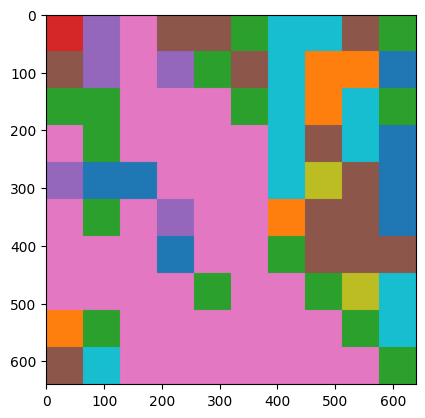

In [6]:
img = image_colormap(y_pred)
plt.imshow(img);

In [7]:
def image_colormap_changes(changes):    
    '''
    This function receives an np.array with the changes and return a black & white image with the changes in each quadrand
    '''
    white_box = np.full((64,64,3), 255, dtype='uint8')
    white_box = Image.fromarray(white_box)

    black_box = np.full((64,64,3), 0, dtype='uint8')
    black_box = Image.fromarray(black_box)

    size = changes.shape[0]
    imgs = {}
    for y in range(size):
        for x in range(size):
            imgs[f"{x}_{y}"] = white_box if changes[y,x] == 0 else black_box

    img = stitch_tiles(imgs, 0, 0, size, 64)
    return img

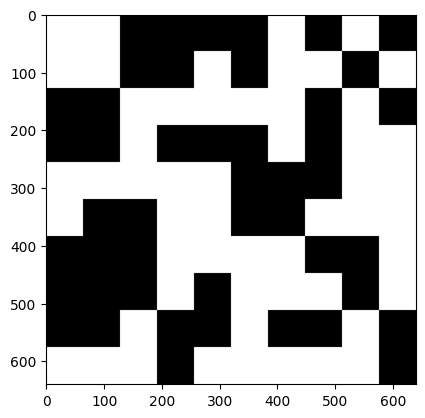

In [8]:
img = image_colormap_changes(changes)
plt.imshow(img);

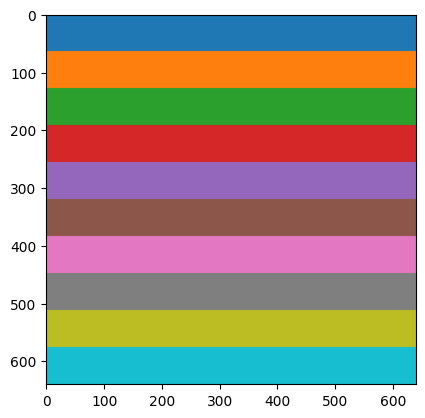

In [9]:
img = image_colormap(cat_pred)
plt.imshow(img);

In [10]:
import pandas as pd
labels = [[0,'Annual Crop', 10],
          [1,'Forest', 1],
          [2,'Herbaceous Vegetation', 1],
          [3,'Highway', 1],
          [4,'Industrial', 1],
          [5,'Pasture', 1],
          [6,'Permanent Crop', 1],
          [7,'Residential', 1],
          [8,'River', 1],
          [9,'Sea Lake', 1]]

df = pd.DataFrame(labels)
df.columns = ['ID', 'Category', 'Value']
df

,ID,Category,Value
0,0,Annual Crop,10
1,1,Forest,1
2,2,Herbaceous Vegetation,1
3,3,Highway,1
4,4,Industrial,1
5,5,Pasture,1
6,6,Permanent Crop,1
7,7,Residential,1
8,8,River,1
9,9,Sea Lake,1


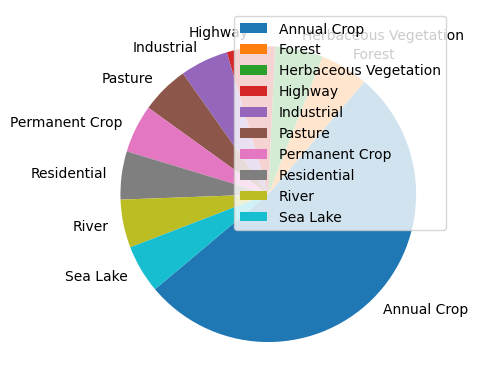

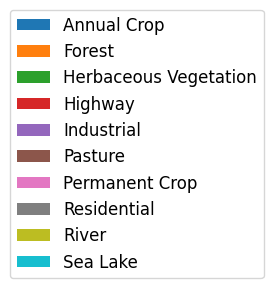

In [11]:
fig, ax = plt.subplots()
ax.pie(df["Value"].dropna(), 
       startangle=220,
       labels=df.Category,)
ax.legend(loc="best")

# get handles and labels for reuse
label_params = ax.get_legend_handles_labels() 

figl, axl = plt.subplots(figsize = (2.6, 2.75))
axl.axis(False)
axl.legend(*label_params, loc="center", bbox_to_anchor=(0.485, 0.5), prop={"size":12})
figl.savefig("LABEL_ONLY.png")